In [ ]:
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf


In [ ]:
avocadoprice = pd.read_csv('/content/avocado.csv')

In [ ]:
print(np.shape(avocadoprice))

(18249, 14)


In [ ]:
avocadoprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


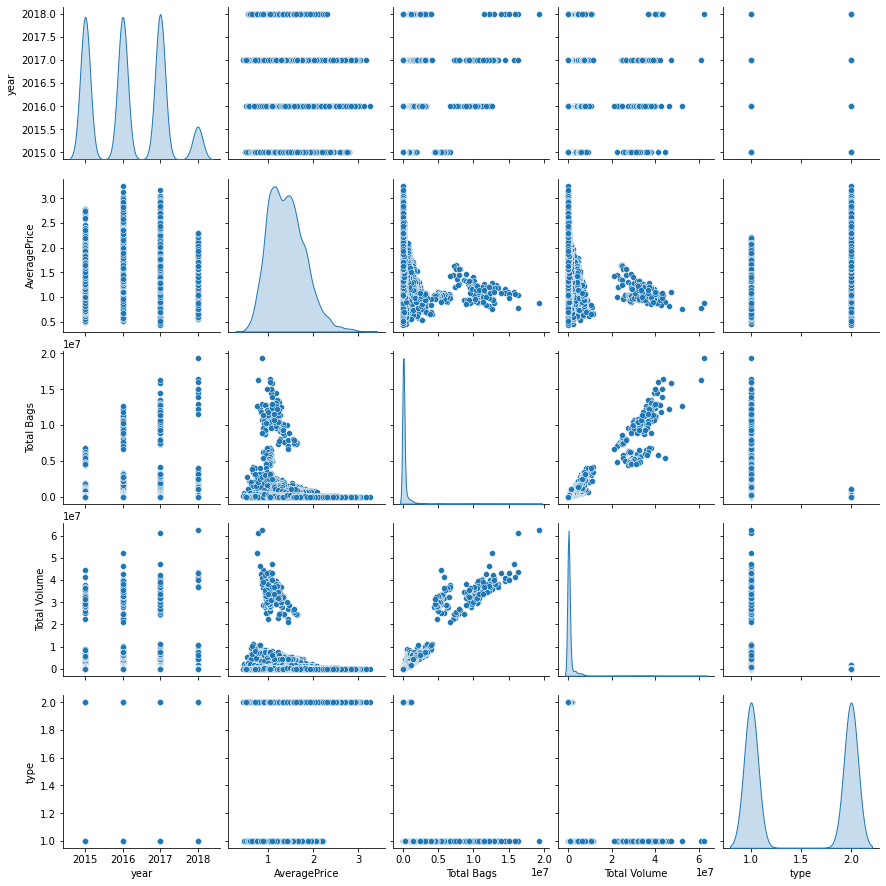

In [ ]:
import seaborn as sns
sns.pairplot(avocadoprice[["year", "AveragePrice", "Total Bags", "Total Volume","type"]], diag_kind="kde")

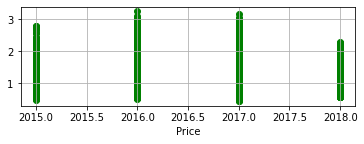

In [ ]:
plt.subplot(211)
plt.scatter(avocadoprice['year'], avocadoprice['AveragePrice'], c='g')
plt.xlabel('year')
plt.xlabel('Price')
plt.grid(True)
plt.show()

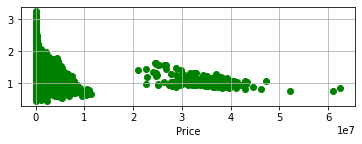

In [ ]:
plt.subplot(211)
plt.scatter(avocadoprice['Total Volume'], avocadoprice['AveragePrice'], c='g')
plt.xlabel('Volume')
plt.xlabel('Price')
plt.grid(True)
plt.show()

In [ ]:
avocadoprice['type'] = avocadoprice['type'].str.replace('organic','2').str.replace('conventional','1')

In [ ]:
avocadoprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  int64  
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [ ]:
avocadoprice['type'] = pd.to_numeric(avocadoprice['type'])

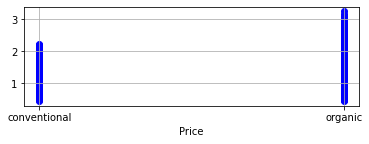

In [ ]:
plt.subplot(212)
plt.scatter(avocadoprice['type'], avocadoprice['AveragePrice'], c='b')
plt.xlabel('Type')
plt.xlabel('Price')
plt.grid(True)
plt.show()

In [ ]:
avocado_data = avocadoprice[['Total Volume','type']]

In [ ]:
avocado_data

,Total Volume,type
0,64236.62,1
1,54876.98,1
2,118220.22,1
3,78992.15,1
4,51039.60,1
...,...,...
18244,17074.83,2
18245,13888.04,2
18246,13766.76,2
18247,16205.22,2


In [ ]:
transform = MinMaxScaler()
trans_avocado_data = transform.fit_transform(avocado_data)
x_train, x_test,y_train,y_test = train_test_split(trans_avocado_data, avocadoprice['AveragePrice'], test_size=0.2) 

In [ ]:
network = models.Sequential()
network.add(layers.Dense(128, activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(1))

optimizer = tf.keras.optimizers.RMSprop(0.001)

network.compile(optimizer = optimizer , loss='mse', metrics = ['mae','mse'])


In [ ]:
network.fit(x_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0988 - mae: 0.2406 - mse: 0.0988
Epoch 2/100
115/115 [==============================] - 0s 1ms/step - loss: 0.0985 - mae: 0.2403 - mse: 0.0985
Epoch 3/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0989 - mae: 0.2412 - mse: 0.0989
Epoch 4/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0985 - mae: 0.2407 - mse: 0.0985
Epoch 5/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0982 - mae: 0.2402 - mse: 0.0982
Epoch 6/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0981 - mae: 0.2400 - mse: 0.0981
Epoch 7/100
115/115 [==============================] - 0s 1ms/step - loss: 0.0984 - mae: 0.2404 - mse: 0.0984
Epoch 8/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0980 - mae: 0.2401 - mse: 0.0980
Epoch 9/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0983 - mae: 0.2402 - mse: 0.0983
Epoch 10/1

In [ ]:
y_test

4836     1.16
6781     0.77
9371     1.86
15937    1.28
12801    1.79
         ... 
14489    1.73
6031     1.26
1105     0.97
18       1.34
15442    1.82
Name: AveragePrice, Length: 3650, dtype: float64

In [ ]:
def compare_graph(network, x_test, y_test) :

  y_pred = network.predict(x_test).flatten()
  real = []
  pred = []
  index = []
  print('d')
  for i in range(100) :
    index.append(i)
    real.append(y_test[i])
    pred.append(y_pred[i])

  plt.figure(figsize=(10,5))
  plt.plot(index, real, 'b-', label='Real Price')
  plt.plot(index, pred, 'r--', label='Pred price')
  plt.legend(loc='center left', fontsize = 12)
  plt.show()    

d


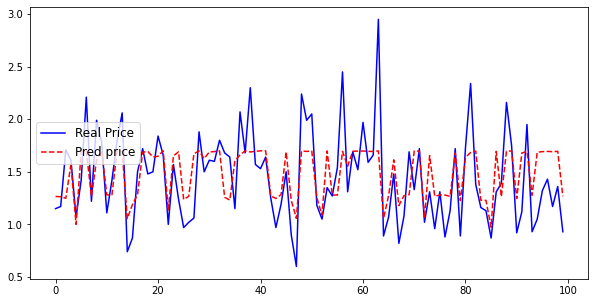

In [ ]:
x_test = np.array(x_test)
y_test = np.array(y_test)
compare_graph(network,x_test,y_test)

In [ ]:

x_test_trans = transform.fit_transform(x_test)

In [ ]:
avocado_data = avocadoprice[['Total Volume','Total Bags']]

In [ ]:
avocado_data

,Total Volume,Total Bags
0,64236.62,8696.87
1,54876.98,9505.56
2,118220.22,8145.35
3,78992.15,5811.16
4,51039.60,6183.95
...,...,...
18244,17074.83,13498.67
18245,13888.04,9264.84
18246,13766.76,9394.11
18247,16205.22,10969.54


In [ ]:
transform = MinMaxScaler()
trans_avocado_data = transform.fit_transform(avocado_data)
x_train, x_test,y_train,y_test = train_test_split(trans_avocado_data, avocadoprice['AveragePrice'], test_size=0.2) 

In [ ]:
network = models.Sequential()
network.add(layers.Dense(128, activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(1))

optimizer = tf.keras.optimizers.RMSprop(0.001)

network.compile(optimizer = optimizer , loss='mse', metrics = ['mae','mse'])


In [ ]:
network.fit(x_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
115/115 [==============================] - 1s 2ms/step - loss: 0.8443 - mae: 0.7455 - mse: 0.8443
Epoch 2/100
115/115 [==============================] - 0s 1ms/step - loss: 0.1516 - mae: 0.3123 - mse: 0.1516
Epoch 3/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1503 - mae: 0.3113 - mse: 0.1503
Epoch 4/100
115/115 [==============================] - 0s 1ms/step - loss: 0.1434 - mae: 0.3006 - mse: 0.1434
Epoch 5/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1403 - mae: 0.2973 - mse: 0.1403
Epoch 6/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1321 - mae: 0.2887 - mse: 0.1321
Epoch 7/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1266 - mae: 0.2816 - mse: 0.1266
Epoch 8/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1189 - mae: 0.2711 - mse: 0.1189
Epoch 9/100
115/115 [==============================] - 0s 1ms/step - loss: 0.1142 - mae: 0.2657 - mse: 0.1142
Epoch 10/1

d


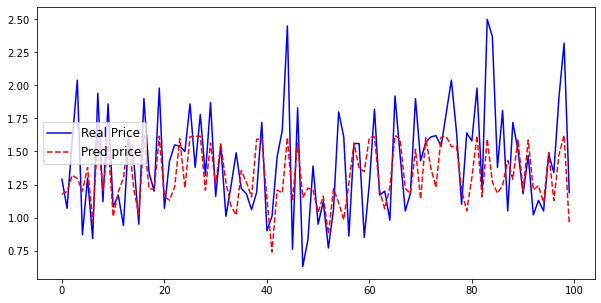

In [ ]:
x_test = np.array(x_test)
y_test = np.array(y_test)
compare_graph(network,x_test,y_test)

In [ ]:
avocado_data = avocadoprice[['Total Bags','year']]   

In [ ]:
avocado_data

,Total Bags,year
0,8696.87,2015
1,9505.56,2015
2,8145.35,2015
3,5811.16,2015
4,6183.95,2015
...,...,...
18244,13498.67,2018
18245,9264.84,2018
18246,9394.11,2018
18247,10969.54,2018


In [ ]:
transform = MinMaxScaler()
trans_avocado_data = transform.fit_transform(avocado_data)
x_train, x_test,y_train,y_test = train_test_split(trans_avocado_data, avocadoprice['AveragePrice'], test_size=0.2)

In [ ]:
network = models.Sequential()
network.add(layers.Dense(128, activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(1))

optimizer = tf.keras.optimizers.RMSprop(0.001)

network.compile(optimizer = optimizer , loss='mse', metrics = ['mae','mse'])


In [ ]:
network.fit(x_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
115/115 [==============================] - 1s 1ms/step - loss: 0.6569 - mae: 0.6436 - mse: 0.6569
Epoch 2/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1597 - mae: 0.3212 - mse: 0.1597
Epoch 3/100
115/115 [==============================] - 0s 1ms/step - loss: 0.1530 - mae: 0.3148 - mse: 0.1530
Epoch 4/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1503 - mae: 0.3081 - mse: 0.1503
Epoch 5/100
115/115 [==============================] - 0s 1ms/step - loss: 0.1509 - mae: 0.3091 - mse: 0.1509
Epoch 6/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1470 - mae: 0.3064 - mse: 0.1470
Epoch 7/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1438 - mae: 0.3003 - mse: 0.1438
Epoch 8/100
115/115 [==============================] - 0s 1ms/step - loss: 0.1380 - mae: 0.2954 - mse: 0.1380
Epoch 9/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1332 - mae: 0.2902 - mse: 0.1332
Epoch 10/1

d


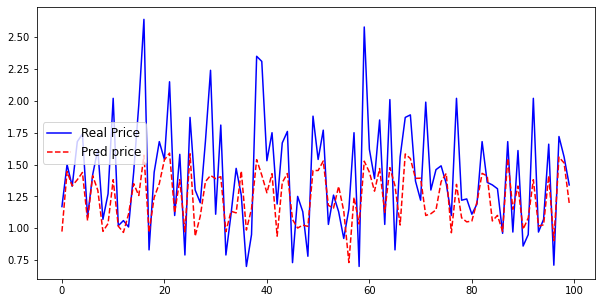

In [ ]:
x_test = np.array(x_test)
y_test = np.array(y_test)
compare_graph(network,x_test,y_test)